In [13]:
import matplotlib.pyplot as plt
import numpy as np
import math

#Initialize  t, y and arrays

In [14]:
# Stores data regarding the current and past states of a single pendulum
class Pendulum:
    def __init__(self, theta0):
        # Angular velocity
        self.vel = [0]
        # Angular position
        self.theta = [theta0]
        # Vector of timesteps
        self.t = [0,dt]
        # Initialize velocity and position with the Euler integration 
        # scheme
        accel = cal_accel(self, theta0);
        self.vel.append(self.vel[-1]+accel*dt);
        self.theta.append(self.theta[-1]+self.vel[-1]*dt);


In [15]:
# Initialize simulation parameters
dt = .01
iterations = 10000
# Gamma in this case is the strength of the driving force
gamma = 5
# Omega in this case is the frequency with which the driving force
# oscillates
omega = 3
# Beta is the damping coefficient in this equation
beta = 0.5
# k = root(g/L)
k = 1.0

In [16]:
# Purpose: Calculate the acceleration of a driven, damped pendulum,
# given its current angular position and the current simulation time
# Arguments: A Pendulum object and the Pendulum's current angle
# Retuns: The acceleration of the pendulum at this point in time
def cal_accelDrivenDamped(pend, theta):
    accel = -(k**2)*math.sin(theta)+ \
              gamma*(k**2)*math.sin(pend.t[-1]*omega) - beta*pend.vel
    return accel

# Purpose: Calculate the acceleration of a driven pendulum, given its
# current angular position and the current simulation time
# Arguments: A Pendulum object and the Pendulum's current angle
# Retuns: The acceleration of the pendulum at this point in time
def cal_accelDrivenDamped(pend, theta):
    accel = -(k**2)*math.sin(theta)+ \
              gamma*(k**2)*math.sin(pend.t[-1]*omega)
    return accel

# Purpose: Calculate the acceleration of an undriven pendulum, given its
# current angular position and the current simulation time
# Arguments: A Pendulum object and the Pendulum's current angle
# Retuns: The acceleration of the pendulum at this point in time
def cal_accel(pend, theta):
    accel = -(k**2)*math.sin(theta)
    return accel

# Purpose: Perform a single step in a Bashforth-Adams integration of a
# driven , damped simple pendulum
# Arguments: The Pendulum to integrate over
# Returns: The same Pendulum, one integration step further on
def bashforthadamsDrivenDamped(pend):
    vn = pend.vel[-1] + 1.5*dt*cal_accelDrivenDamped(pend, \
         pend.theta[-1]) - 0.5*dt* \
         cal_accelDrivenDamped(pend, pend.theta[-2])
    thn = pend.theta[-1] + 1.5*dt*pend.vel[-1] - 0.5*dt*pend.vel[-2]
    pend.vel.append(vn)
    pend.theta.append(thn)
    
# Purpose: Perform a single step in a Bashforth-Adams integration of a
# driven simple pendulum
# Arguments: The Pendulum to integrate over
# Returns: The same Pendulum, one integration step further on
def bashforthadamsDrivenDamped(pend):
    vn = pend.vel[-1] + 1.5*dt*cal_accelDriven(pend, pend.theta[-1]) - \
         0.5*dt*cal_accelDriven(pend, pend.theta[-2])
    thn = pend.theta[-1] + 1.5*dt*pend.vel[-1] - 0.5*dt*pend.vel[-2]
    pend.vel.append(vn)
    pend.theta.append(thn)
    
# Purpose: Perform a single step in a Bashforth-Adams integration of a
# driven simple pendulum
# Arguments: The Pendulum to integrate over
# Returns: The same Pendulum, one integration step further on
def bashforthadamsDriven(pend):
    vn = pend.vel[-1] + 1.5*dt*cal_accelDriven(pend, pend.theta[-1]) - \
         0.5*dt*cal_accelDriven(pend, pend.theta[-2])
    thn = pend.theta[-1] + 1.5*dt*pend.vel[-1] - 0.5*dt*pend.vel[-2]
    pend.vel.append(vn)
    pend.theta.append(thn)

# Purpose: Perform a single step in a Bashforth-Adams integration of a
# simple pendulum
# Arguments: The Pendulum to integrate over
# Returns: The same Pendulum, one integration step further on
def bashforthadams(pend):
    vn = pend.vel[-1] + 1.5*dt*cal_accel(pend, pend.theta[-1]) - \
         0.5*dt*cal_accel(pend, pend.theta[-2])
    thn = pend.theta[-1] + 1.5*dt*pend.vel[-1] - 0.5*dt*pend.vel[-2]
    pend.vel.append(vn)
    pend.theta.append(thn)    

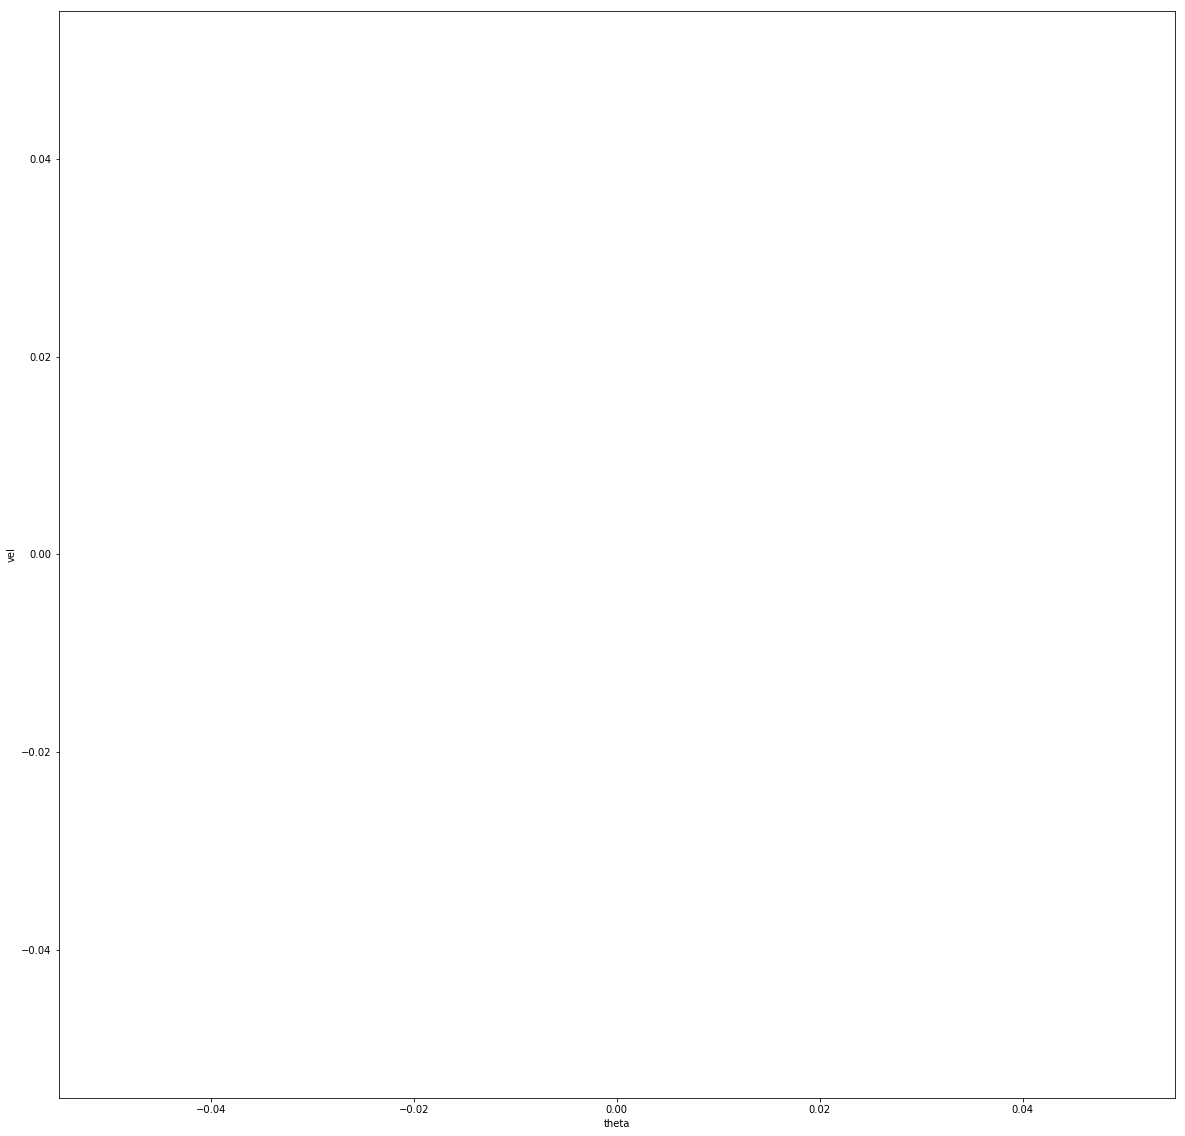

In [17]:
pi = math.pi
pend = []
numPlots = 1
maxPiFraction = 0.5
plt.clf()
for i in range(numPlots):
    pend.append(Pendulum((maxPiFraction * pi)*i/(numPlots)))

fig = plt.figure(figsize=(20,20));
for i in range(numPlots):
    run_oscillator(pend[i])
    sub = fig.add_subplot(111)
    sub.plot(pend[i].theta, pend[i].vel)
    
# plt.xlim([-5,5])
# plt.ylim([-3,3])
plt.xlabel('theta')
plt.ylabel('vel')
plt.show()



In [18]:
def solve_analytical_small():
    timestep = dt
    pend_small = Pendulum(1)
    t = 0
    for i in range(iterations):
            t += timestep
            pend_small.theta.append(pend_small.theta[0]*math.cos(k*t))
            pend_small.vel.append(-k*pend_small.theta[0]*math.sin(k*t))
            pend_small.t.append(t)
    return pend_small

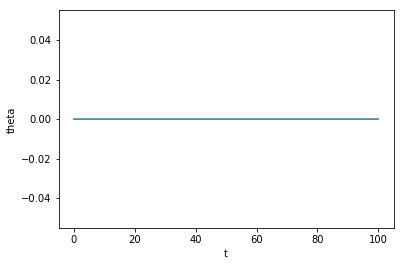

In [19]:
pend_small = solve_analytical_small()
plt.plot(pend[0].t, pend[0].theta)
plt.xlabel('t')
plt.ylabel('theta')
plt.show()

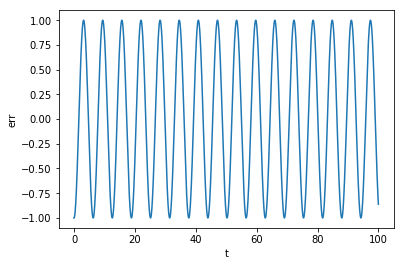

In [20]:
err = [];
for i in range(iterations+2):
    err.append(pend[0].theta[i] - pend_small.theta[i])

plt.plot(pend_small.t, err)
plt.xlabel('t')
plt.ylabel('err')
plt.show()